In [1]:
import numpy as np
from matplotlib import pyplot as plt
import cv2

In [44]:
def creat_gauss_kernel(ksize, sigma, min_response = 0.001):
    x = cv2.getGaussianKernel(ksize=ksize, sigma=sigma)
    y = cv2.getGaussianKernel(ksize=ksize, sigma=sigma)
    mat = np.multiply(x, np.transpose(y))
    center = ksize//2
    rate = 1/mat[center][center]
    mat = mat * rate
    mat = np.where(mat>min_response, mat, 0)
    return mat

def creat_heatmap(points, img_w, img_h, ksize = 101, sigma = 20):
    mat = creat_gauss_kernel(ksize, sigma)
    r = ksize // 2
    heat_map = np.zeros((img_h, img_w))
    for point in points:
        top = point[1] - r
        bottom = img_h - (point[1] + r)
        left = point[0] - r
        right = img_w - (point[0] + r)
        
        pad = [top if top > 0 else 0,
               bottom if bottom > 0 else 0,
               left if left > 0 else 0,
               right if right > 0 else 0]
        tmp_map = cv2.copyMakeBorder(mat, pad[0], pad[1], pad[2], pad[3], cv2.BORDER_CONSTANT, value=0)
        
        tl = [-top if top < 0 else 0,
              -left if left < 0 else 0]
        tmp_map = tmp_map[tl[0]:tl[0]+img_h, tl[1]:tl[1]+img_w]
        heat_map += tmp_map
    
    return heat_map

In [49]:
points = [[-10,-10], [100,100], [200,200],[300,300],[400,400], [610,800]]
img_w = 600
img_h = 800
heat_map = creat_heatmap(points, img_w, img_h)

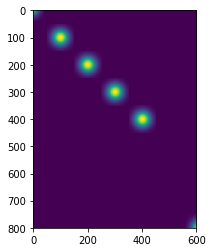

In [50]:
plt.imshow(heat_map)

In [35]:
gauss_kernel

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])